# Table of Contents
1. Introduction to Problem Statment
2. Install Package and Dependencies
3. Load and Undestand Dataset
4. Data Preparation
5. Feature Engineering
6. Model Building

##  1. Introduction to Problem Statement

The CTU-13 is a dataset of botnet traffic that was captured in the CTU University, Czech Republic, in 2011. The goal of the dataset was to have a large capture of real botnet traffic mixed with normal traffic and background traffic. The CTU-13 dataset consists in thirteen captures (called scenarios) of different botnet samples. On each scenario we executed a specific malware, which used several protocols and performed different actions, please check the following link for more information. https://mcfp.weebly.com/the-ctu-13-dataset-a-labeled-dataset-with-botnet-normal-and-background-traffic.html  

Each scenario was captured in a pcap file that contains all the packets of the three types of traffic. These pcap files were processed to obtain other type of information, such as NetFlows, WebLogs, etc. The first analysis of the CTU-13 dataset used unidirectional NetFlows to represent the traffic and to assign the labels. These unidirectional NetFlows should not be used because they were outperformed by our second analysis of the dataset, which used bidirectional NetFlows. The bidirectional NetFlows have several advantages over the directional ones.  

Dataset source: https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/

##  2. Install Package & Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## 3. Load and Understand Dataset

In [2]:
url="https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/capture20110810.binetflow.2format"
dataset = pd.read_csv(url)
dataset = dataset[dataset['Label'].str.contains('Botnet')] #Getting the bot net data
print('Rows:',dataset.shape[0], 'Columns:', dataset.shape[1])
dataset.sample(5)

Rows: 40961 Columns: 33


,SrcAddr,DstAddr,Proto,Sport,Dport,State,sTos,dTos,SrcWin,DstWin,...,SAppBytes,DAppBytes,Dur,TotPkts,TotBytes,TotAppByte,Rate,SrcRate,DstRate,Label
2600512,147.32.84.165,192.93.0.4,udp,2077,53,CON,0.0,0.0,NaN,NaN,...,26,97,0.030506,2,207,123,32.780437,0.000000,0.0,flow=From-Botnet-V42-UDP-DNS
2089648,147.32.84.165,209.85.225.27,tcp,3058,25,REQ,0.0,NaN,64240.0,NaN,...,0,0,9.013443,3,186,0,0.221891,0.221891,0.0,flow=From-Botnet-V42-TCP-Attempt-SPAM
2767459,147.32.84.165,147.32.80.9,udp,2079,53,CON,0.0,0.0,NaN,NaN,...,27,27,0.000397,2,138,54,2518.891602,0.000000,0.0,flow=From-Botnet-V42-UDP-DNS
1743063,147.32.84.165,193.232.156.17,udp,2077,53,CON,0.0,0.0,NaN,NaN,...,35,124,0.103234,2,243,159,9.686731,0.000000,0.0,flow=From-Botnet-V42-UDP-DNS
2604769,147.32.84.165,217.107.217.16,udp,2077,53,CON,0.0,0.0,NaN,NaN,...,40,91,0.061295,2,215,131,16.314545,0.000000,0.0,flow=From-Botnet-V42-UDP-DNS


In [3]:
dataset['Label'].nunique()

68

## 4. Data Preparation

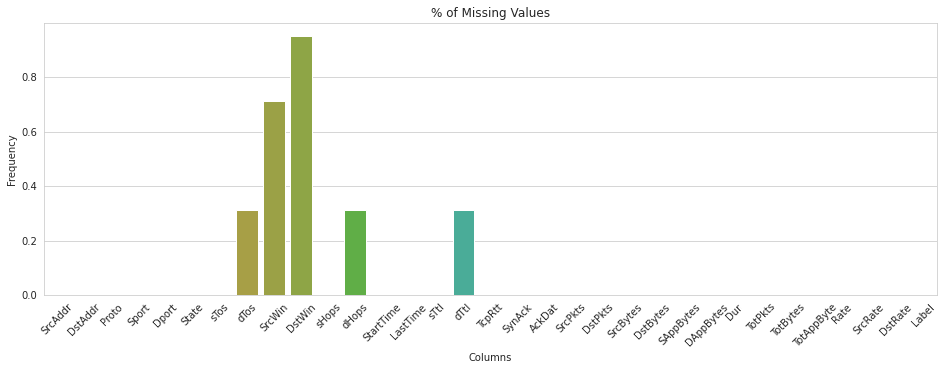

In [4]:
#Visualizing the Missing value
plt.figure(figsize=(16,5))
sns.set_style('whitegrid')
plt.title('% of Missing Values')
sns.barplot(x=dataset.isnull().mean().index, y=dataset.isnull().mean().values)
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# Removed all the columns with missing value > 30%
dataset = dataset.loc[:, dataset.isnull().mean() < 0.3] 

## 5. Feature Engineering

In [5]:
dataset = dataset.astype({"Proto":'category',"Sport":'category',"Dport":'category',"State":'category','StartTime':'datetime64[s]','LastTime':'datetime64[s]'}) # Changing the datatype of the columns
dataset['duration'] = abs(dataset['LastTime'].dt.second - dataset['StartTime'].dt.second) # getting duration from the columns 'LastTime' and 'StartTime'
dataset.drop(columns=['SrcAddr','DstAddr','LastTime','StartTime'],inplace=True) #Dropping the column SrcAddr and DstAddr since they contain unique ip addresses

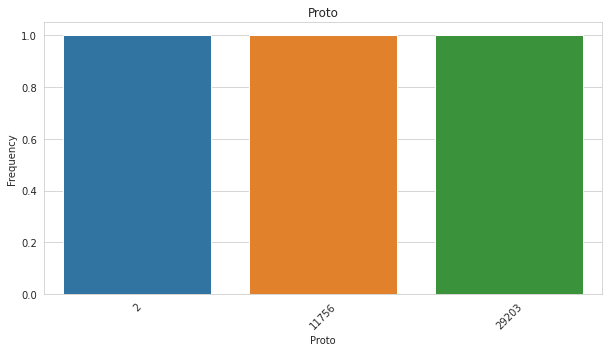

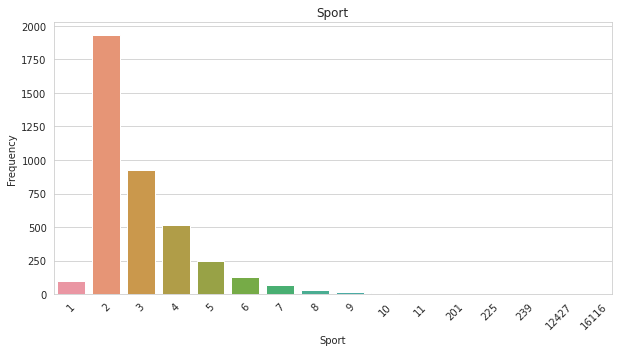

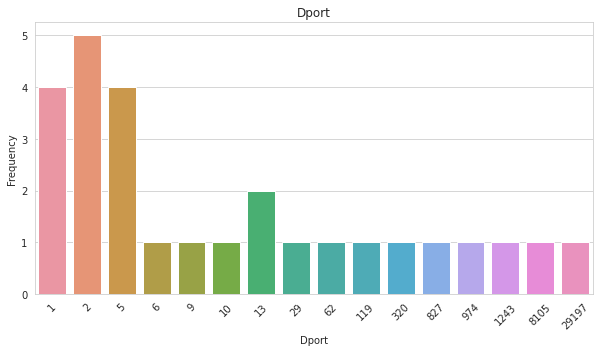

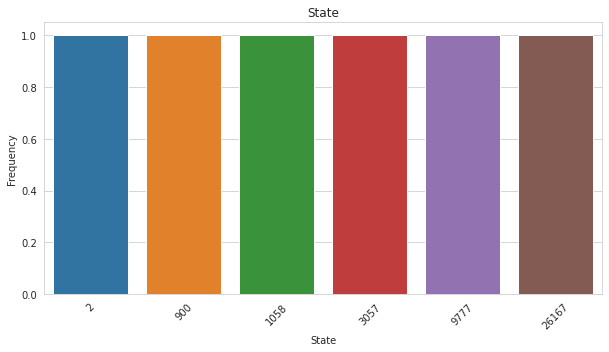

In [6]:
#Analyzing categorical valriable
def barchart(columns):
    plt.figure(figsize=(10,5))
    plt.title(f'{columns}')
    sns.countplot(x=dataset[f'{columns}'].value_counts().values)
    plt.xlabel(f'{columns}')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()
    
categorical_columns = dataset.select_dtypes(exclude=['int64', 'float64']).columns.values      
for column in categorical_columns:
    if column != 'Label':
        barchart(column)

## 6. Model Building

In [7]:
dataset = pd.get_dummies(dataset,columns=categorical_columns[:-1],drop_first=True)
X = dataset.loc[:, dataset.columns != 'Label']
y = dataset.loc[:, dataset.columns == 'Label']

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=45)

### 1. DT Classifier - Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.

In [9]:
descision_tree_model = DecisionTreeClassifier()
descision_tree_model.fit(Xtrain,ytrain)
prediction = descision_tree_model.predict(Xtest)
print('Decision Accuracy Score:',round(accuracy_score(ytest,prediction)*100),'%')

Decision Accuracy Score: 99 %


### 2. Naive Bayes Classifier - based on Bayes Theorem with an assumption of independence among predictors. 

In [10]:
multinomial_naive_bayes = GaussianNB()
multinomial_naive_bayes.fit(Xtrain,ytrain)
prediction_naive = multinomial_naive_bayes.predict(Xtest)
print('Naive Bayes Accuracy Score:',round(accuracy_score(ytest,prediction_naive)*100),'%')

Naive Bayes Accuracy Score: 94 %


### 3. Logistic Regression - probabilities for classification problems with two possible outcomes. It’s an extension of the linear regression model for classification problems.

In [11]:
Logistic_model = LogisticRegression(C=1000)
Logistic_model.fit(Xtrain,ytrain)
prediction_Logistic = Logistic_model.predict(Xtest)
print('Logistic Regression Accuracy Score:',round(accuracy_score(ytest,prediction_Logistic)*100),'%')

Logistic Regression Accuracy Score: 85 %


### 4. Random Forest Classifier - consists of a large number of individual decision trees that operate as an ensemble.

In [12]:
Random_forest_model = RandomForestClassifier(class_weight='balanced')
Random_forest_model.fit(Xtrain,ytrain)
prediction_Random_forest_model = Random_forest_model.predict(Xtest)
print('Random Forest Accuracy Score:',round(accuracy_score(ytest,prediction_Random_forest_model)*100),'%')

Random Forest Accuracy Score: 99 %
